In [277]:
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
train=pd.read_csv("~/Desktop/train.csv")
test=pd.read_csv("~/Desktop/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(15120, 56)
(565892, 55)


In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

All data entries are int type

In [6]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


**Cover type:**
* 1 - Spruce/Fir
* 2 - Lodgepole Pine
* 3 - Ponderosa Pine
* 4 - Cottonwood/Willow
* 5 - Aspen
* 6 - Douglas-fir
* 7 - Krummholz

In [7]:
train.Cover_Type.value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

Balanced classes

In [8]:
train.isna().sum()  #checking for missing value

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


No missing values

### Skewness
Skewness is a measure of symmetry in a distribution.
- If the skewness is equal to zero, data is perfectly symmetrical (normal distribution, mean=median=mode).
- If skewness is positive, the data are positively skewed or skewed right (mean>median).
- If skewness is negative, the data are negatively skewed or skewed left (median>mean).
- Values close to 0 show less skew

In [9]:
train.skew()

Id                                      0.000000
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6          

most of the features are positively skewed (only 3 negatively skewed)

### Checking for Anomalies & Outliers

I am using the logic of extreme outliers to keep as much rows I can keep. This is a standard and widely used technique for outlier detection. So following data points will be dropped if they satisfy the following conditions:

- x < Q1 - 3 * IQR
- x > Q3 + 3 * IQR

In [10]:
def outlier_function(df, col_name):

    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [11]:
# loop through all columns to see if there are any outliers
for column in train.columns:
    if outlier_function(train, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

I am going to perform outlier elimination for Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, and Horizontal_Distance_To_Fire_Points.

I am not going to consider other columns for potential outlier elimination because their data range is already fixed between 0 and 255 (e.g. Hillshade columns) and they seem like one-hot-encoded columns (e.g. Soil type and Wilderness areas)

In [12]:
train.shape

(15120, 56)

In [13]:
train1 = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
train1.shape

(14988, 56)

### For Wilderness Area Type

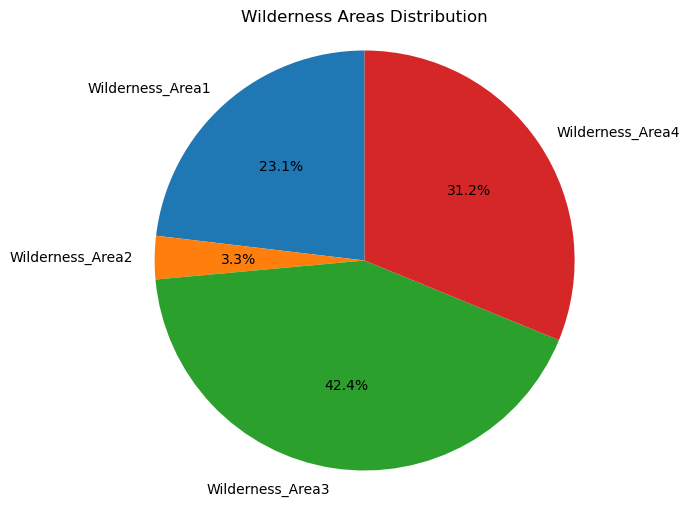

In [14]:
# Calculating the count of each wilderness area
wild_area_counts = train1[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum()
wild_area_percentages = wild_area_counts / wild_area_counts.sum() * 100

plt.figure(figsize=(8, 6))
plt.pie(wild_area_percentages, labels=wild_area_percentages.index, autopct='%.1f%%', startangle=90)
plt.title('Wilderness Areas Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The wilderness areas are:

* 1 - Rawah Wilderness Area
* 2 - Neota Wilderness Area
* 3 - Comanche Peak Wilderness Area
* 4 - Cache la Poudre Wilderness Area

Wilderness Area 3 (Comanche Peak Wilderness Area) accounts for 42% of the total Wild Areas data. The least data is for Area 2 (Neota Wilderness Area) i.e 3.3% in the data.

In [15]:
melted_train = train1.melt(id_vars=['Cover_Type'], value_vars=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'],
                           var_name='Wilderness_Area', value_name='Presence')

wild_area_cover_type_counts = melted_train.groupby(['Wilderness_Area', 'Cover_Type'])['Presence'].sum()

# Resetting the index to make the result a DataFrame
wild_area_cover_type_counts = wild_area_cover_type_counts.reset_index()

#print(wild_area_cover_type_counts)


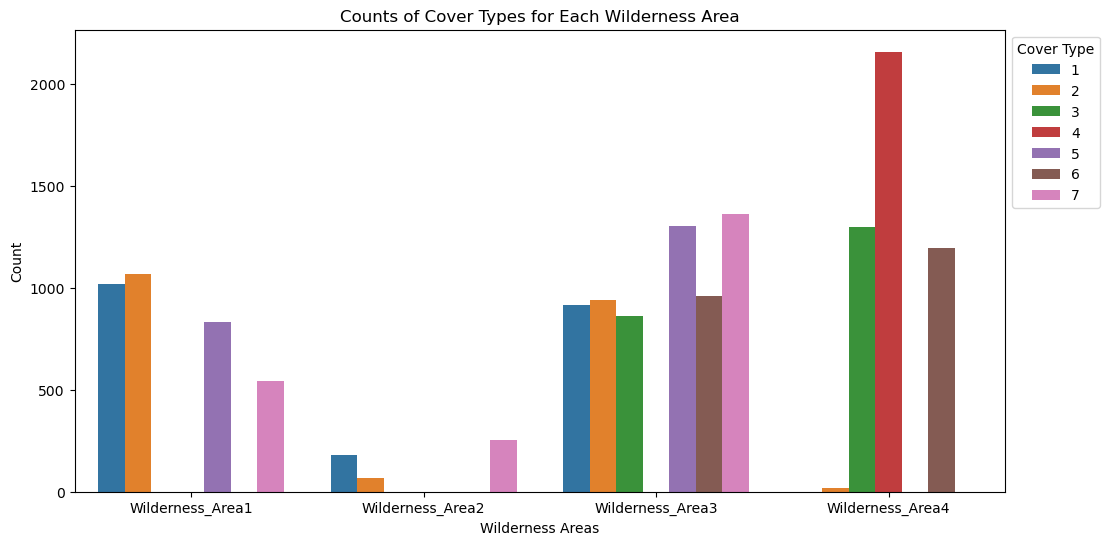

In [16]:
# Creating a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=wild_area_cover_type_counts, x='Wilderness_Area', y='Presence', hue='Cover_Type', palette='tab10')
plt.xlabel('Wilderness Areas')
plt.ylabel('Count')
plt.title('Counts of Cover Types for Each Wilderness Area')
plt.legend(title='Cover Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### For Soil type

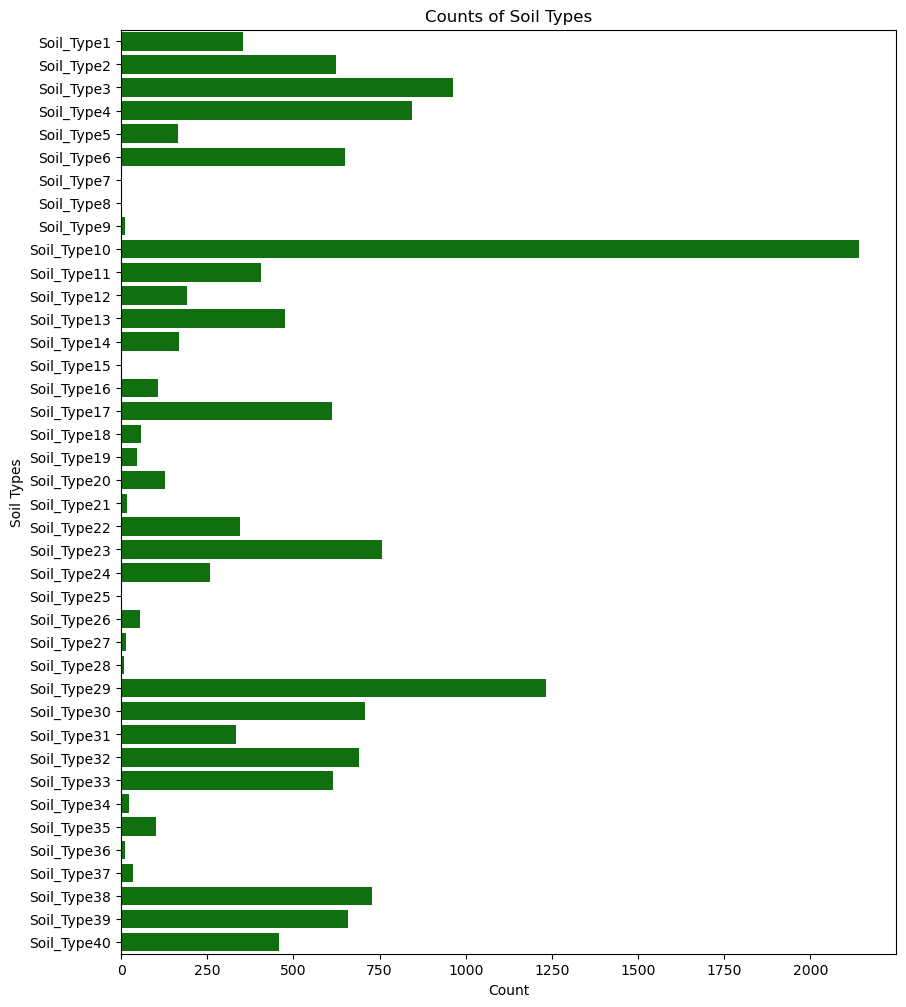

In [17]:
soil_type_counts = train1.iloc[:, 15:-1].sum()

# Getting the names of the soil type columns
soil_type_names = ['Soil_Type' + str(i) for i in range(1, 41)]

# Horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x=soil_type_counts.values, y=soil_type_names, orient='h', color='green')
plt.xlabel('Count')
plt.ylabel('Soil Types')
plt.title('Counts of Soil Types')
plt.show()

In [18]:
print(soil_type_counts[soil_type_counts<=1])

Soil_Type7     0
Soil_Type8     1
Soil_Type15    0
Soil_Type25    1
dtype: int64


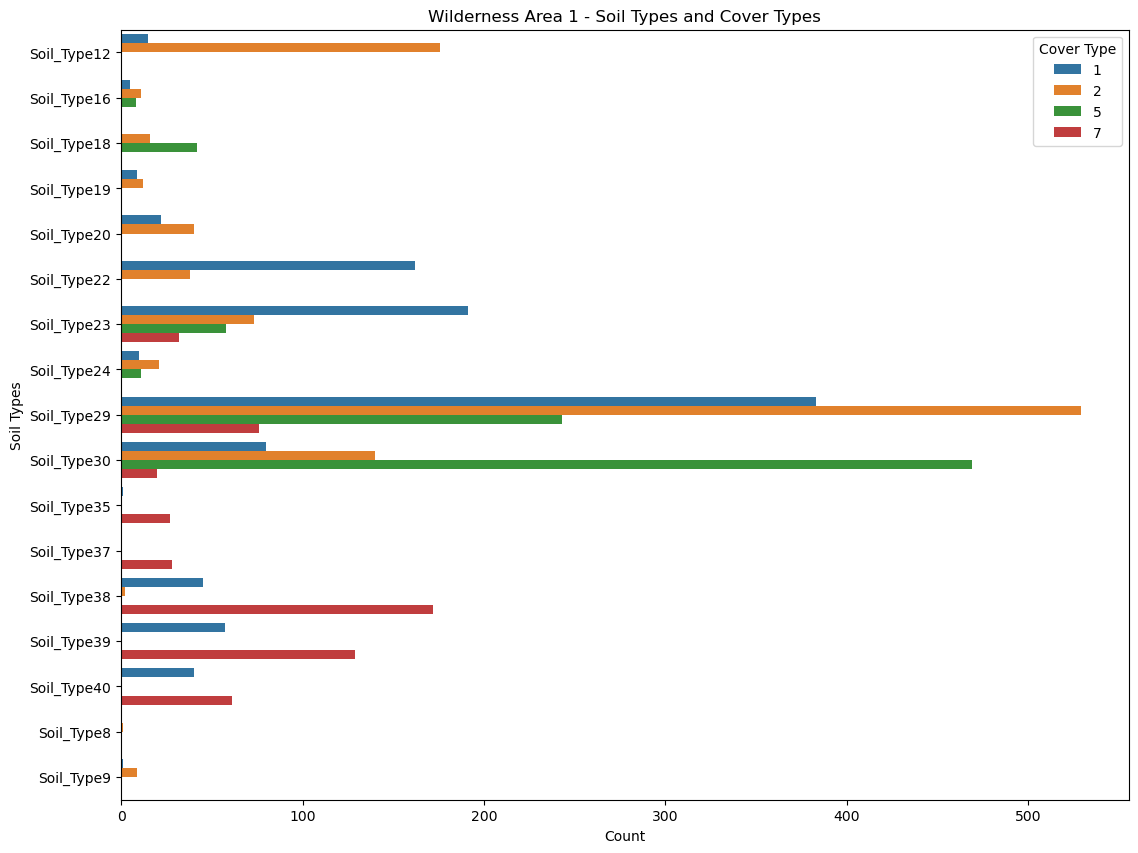

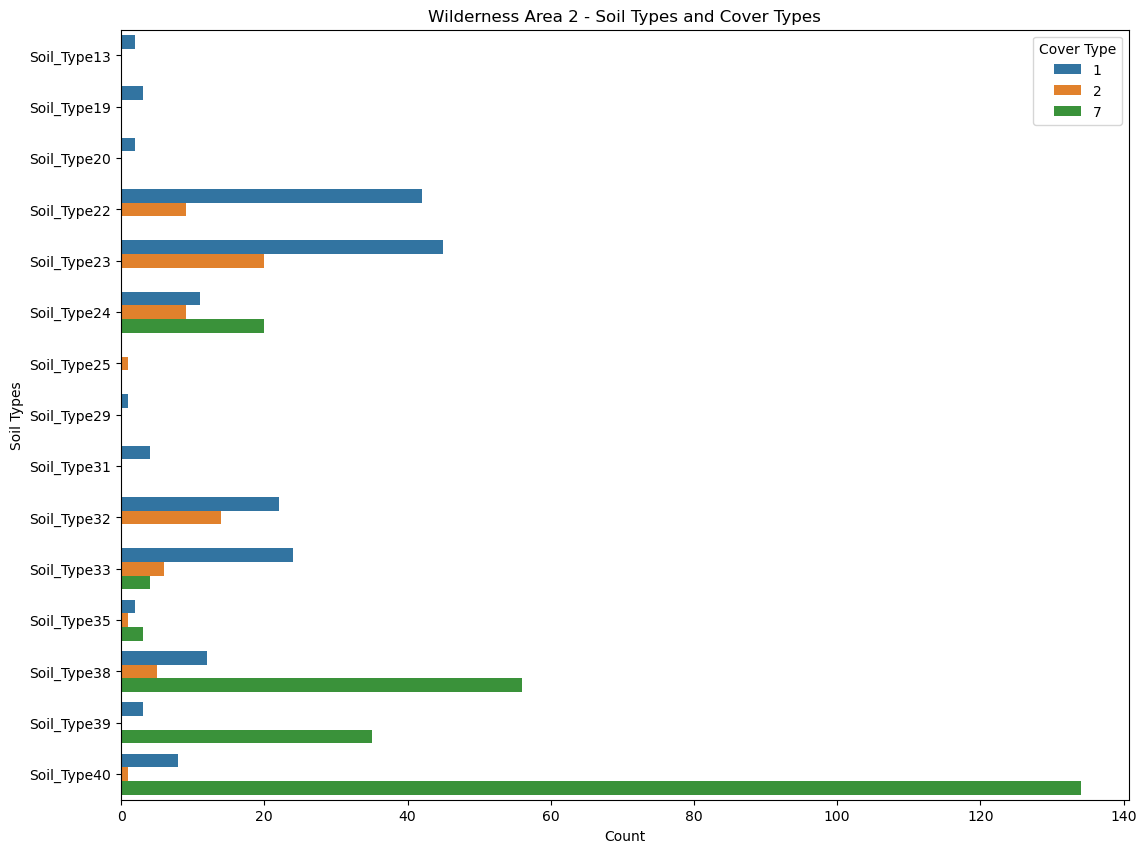

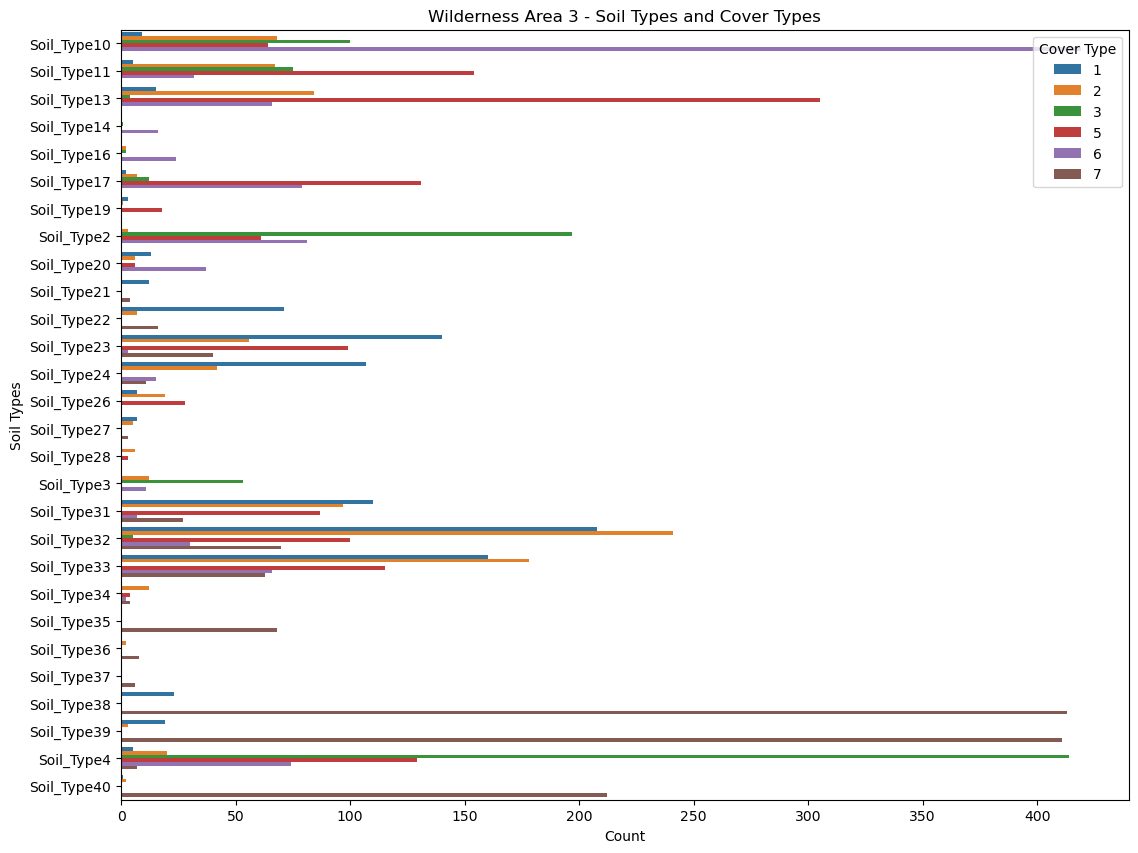

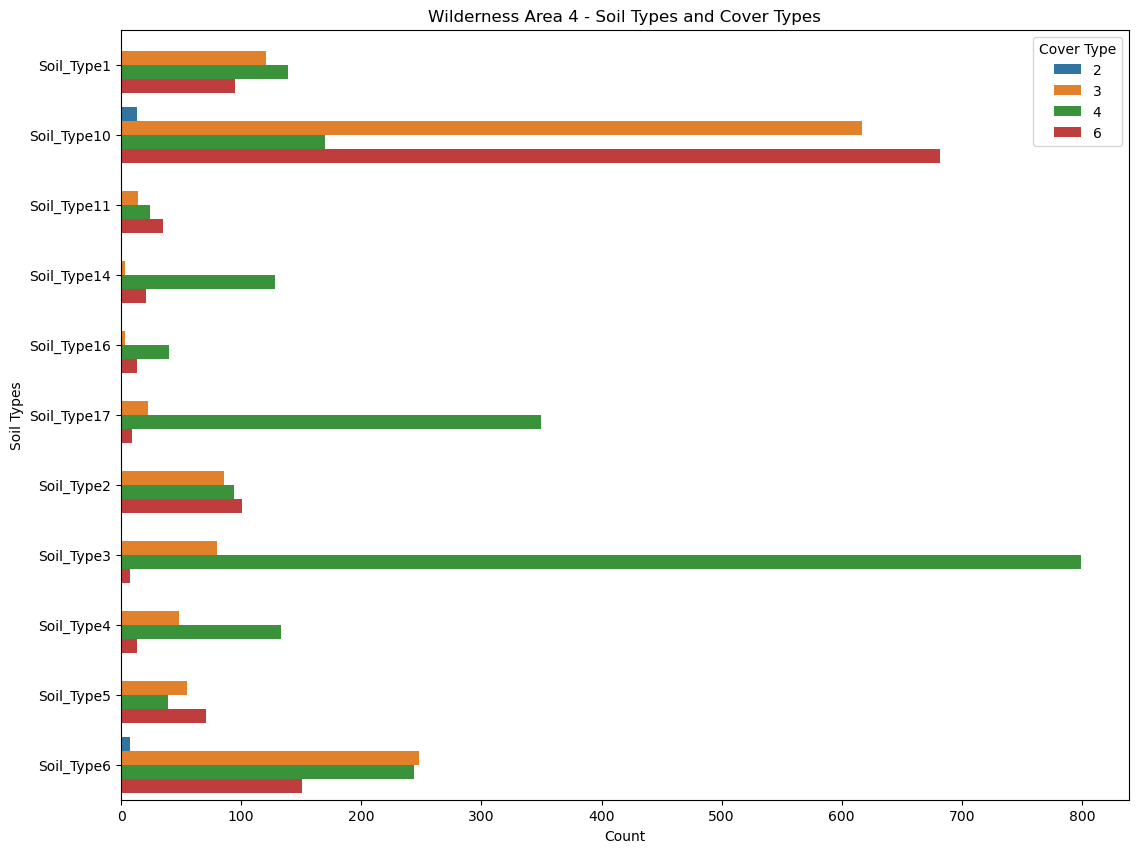

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data to create a long-form DataFrame suitable for Seaborn
melted_train = train1.melt(id_vars=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Cover_Type'],
                         value_vars=['Soil_Type' + str(i) for i in range(1, 41)],
                         var_name='Soil_Type', value_name='Presence')

# Filter out the rows where Soil_Type is present (1)
melted_train = melted_train[melted_train['Presence'] == 1]

# Create separate plots for each wilderness area
for area_num in range(1, 5):
    plt.figure(figsize=(13, 10))
    
    # Filter the data for the current wilderness area
    area_data = melted_train[melted_train[f'Wilderness_Area{area_num}'] == 1]

    # Get the names of the soil types present in the current wilderness area
    soil_type_names = area_data['Soil_Type'].unique()

    # Group and aggregate the data by Soil_Type and Cover_Type
    area_data_counts = area_data.groupby(['Soil_Type', 'Cover_Type']).size().reset_index(name='Count')

    # Create a stacked bar plot for the current wilderness area
    sns.barplot(data=area_data_counts, x='Count', y='Soil_Type', hue='Cover_Type', palette='tab10', orient='h')
    plt.xlabel('Count')
    plt.ylabel('Soil Types')
    plt.title(f'Wilderness Area {area_num} - Soil Types and Cover Types')
    plt.legend(title='Cover Type', loc='upper right')
    plt.show()


In [20]:
#calculating the correlation between the "Cover_Type" column and all other columns
train1.corr()['Cover_Type'].sort_values() 

Wilderness_Area1                     -0.220713
Soil_Type29                          -0.213746
Soil_Type22                          -0.198273
Soil_Type23                          -0.161446
Soil_Type32                          -0.134757
Soil_Type12                          -0.119079
Soil_Type24                          -0.102375
Hillshade_Noon                       -0.095848
Horizontal_Distance_To_Roadways      -0.094212
Soil_Type31                          -0.081487
Soil_Type33                          -0.080995
Horizontal_Distance_To_Fire_Points   -0.062142
Hillshade_3pm                        -0.051264
Soil_Type20                          -0.045699
Soil_Type19                          -0.032426
Soil_Type4                           -0.029852
Soil_Type9                           -0.027360
Soil_Type21                          -0.024796
Soil_Type27                          -0.023480
Soil_Type3                           -0.018500
Soil_Type26                          -0.017741
Soil_Type28  

### Numerical Features

In [21]:
num_features = train1.iloc[:, 1:11]
num_features.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

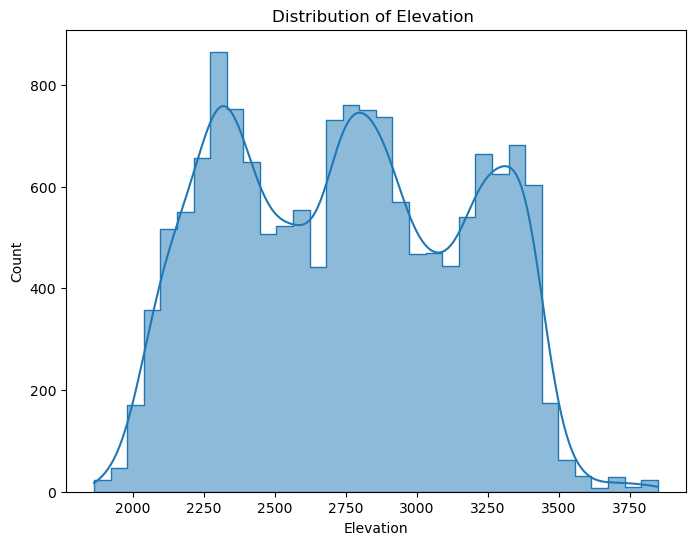

In [22]:
# Plot distribution plot for Elevation by Cover Type
plt.figure(figsize=(8, 6))
sns.histplot(data=train1, x='Elevation', kde=True, palette='viridis', element='step')
plt.xlabel('Elevation')
plt.ylabel('Count')
plt.title('Distribution of Elevation ')
plt.show()


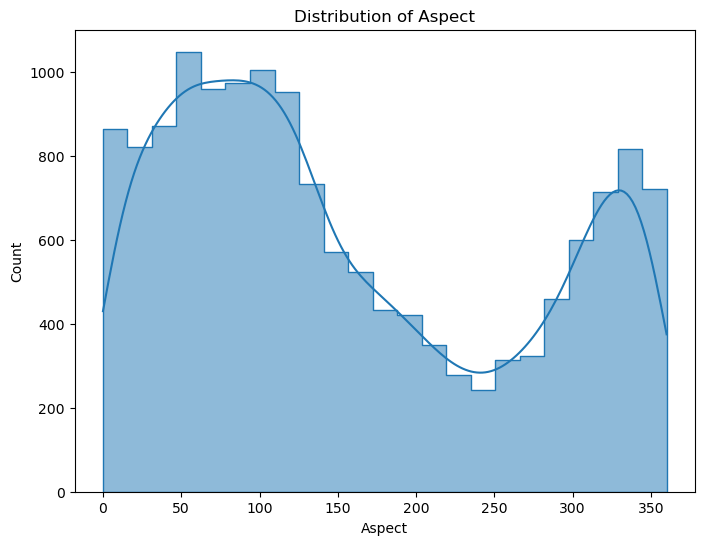

In [23]:
# Plot distribution plot for Aspect by Cover Type
plt.figure(figsize=(8, 6))
sns.histplot(data=train1, x='Aspect', kde=True, palette='viridis', element='step')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.title('Distribution of Aspect')
plt.show()

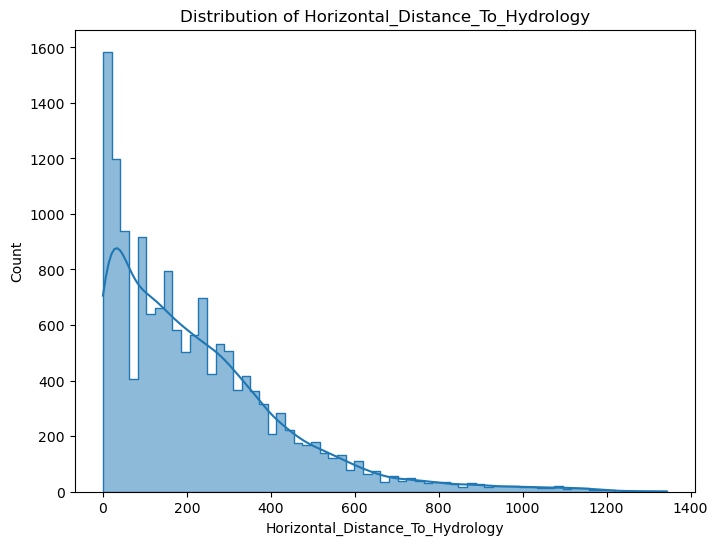

In [24]:
# Plot distribution plot for Horizontal Distannce to Hydrology by Cover Type
plt.figure(figsize=(8, 6))
sns.histplot(data=train1, x='Horizontal_Distance_To_Hydrology', kde=True, palette='viridis', element='step')
plt.xlabel('Horizontal_Distance_To_Hydrology')
plt.ylabel('Count')
plt.title('Distribution of Horizontal_Distance_To_Hydrology')
plt.show()

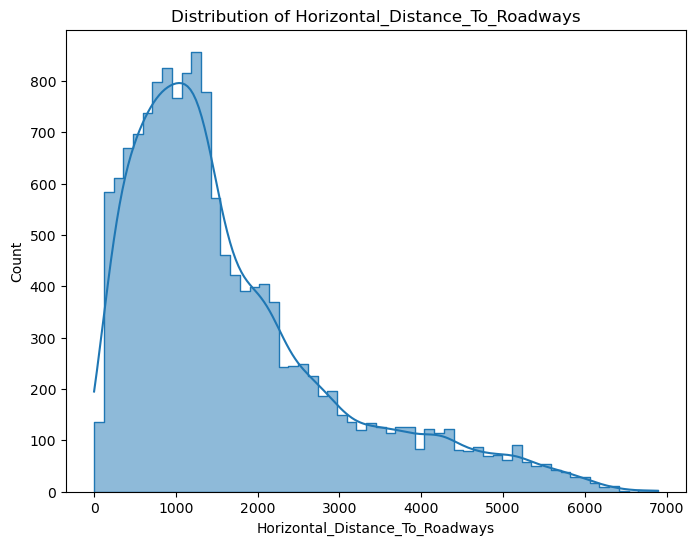

In [25]:
# Plot distribution plot for Horizontal Distannce to Roadways by Cover Type
plt.figure(figsize=(8, 6))
sns.histplot(data=train1, x='Horizontal_Distance_To_Roadways', kde=True, palette='viridis', element='step')
plt.xlabel('Horizontal_Distance_To_Roadways')
plt.ylabel('Count')
plt.title('Distribution of Horizontal_Distance_To_Roadways')
plt.show()

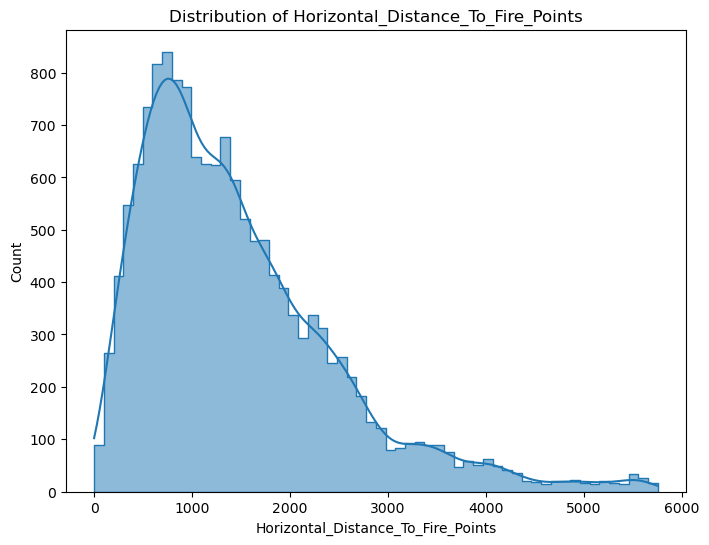

In [26]:
# Plot distribution plot for Horizontal Distannce to Fire Points by Cover Type
plt.figure(figsize=(8, 6))
sns.histplot(data=train1, x='Horizontal_Distance_To_Fire_Points', kde=True, palette='viridis', element='step')
plt.xlabel('Horizontal_Distance_To_Fire_Points')
plt.ylabel('Count')
plt.title('Distribution of Horizontal_Distance_To_Fire_Points')
plt.show()

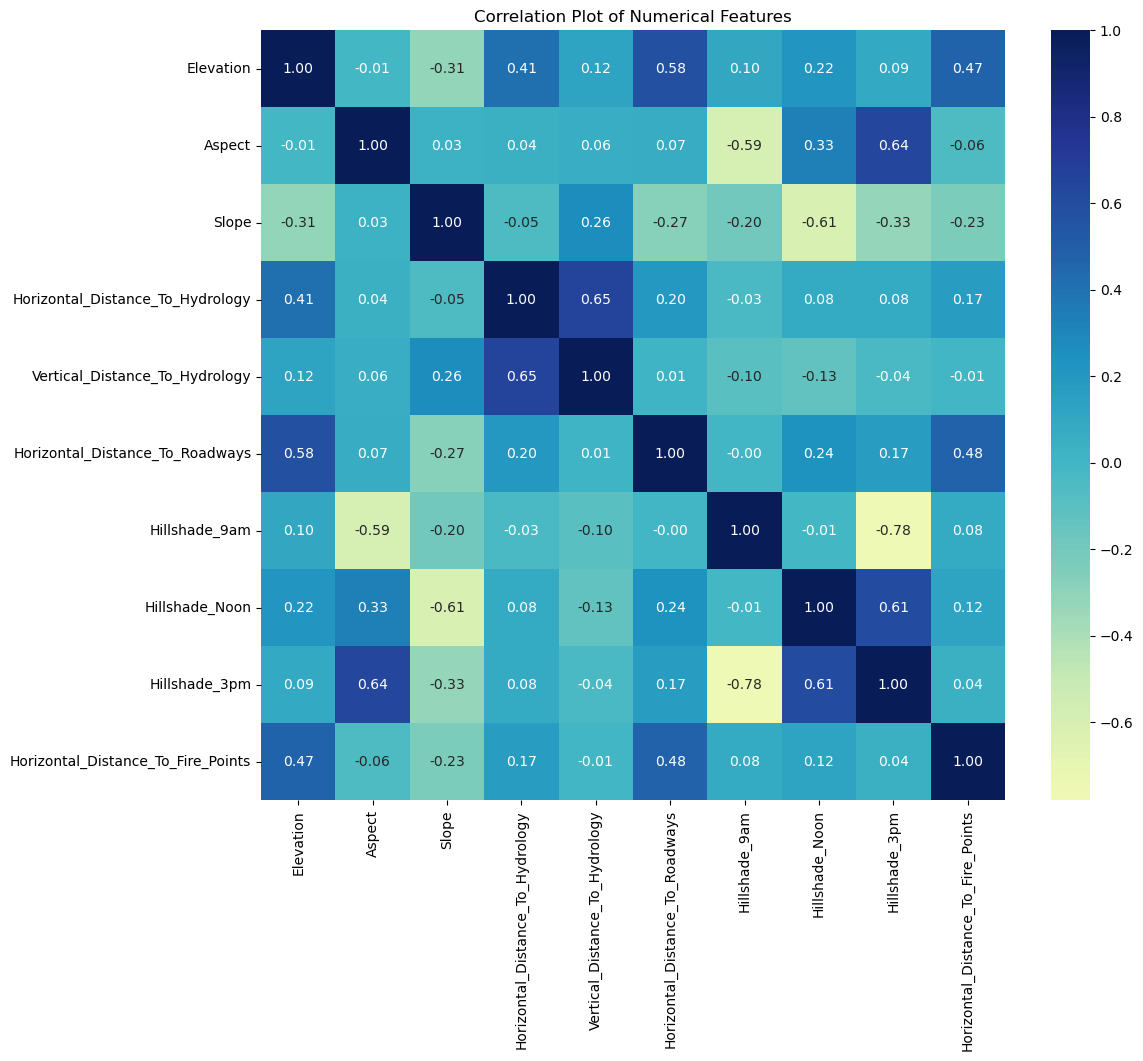

In [27]:
# Correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(num_features.corr(), annot=True, cmap='YlGnBu', fmt='.2f', center=0)
plt.title('Correlation Plot of Numerical Features')
plt.show()

### Correlated features (taking 0.5 as threshold)
- Elevation and Horizontal Distance to Roadways (strongly and positively correlated)
- Aspect and Hillshade at 9am (strongly and negatively correlated)
- Aspect and Hillshade at 3pm (strongly and positively correlated)
- Slope and Hillshade at Noon (strongly and negatively correlated)
- Horizontal Distance to hydrology and Vertical Distance to Hydrology (strongly and positively correlated)
- Hillshade at 9am and Hillshade at 3pm  (strongly and negatively correlated) 
- Hillshade at 3pm and Hillshade at Noon (strongly and positively correlated) 

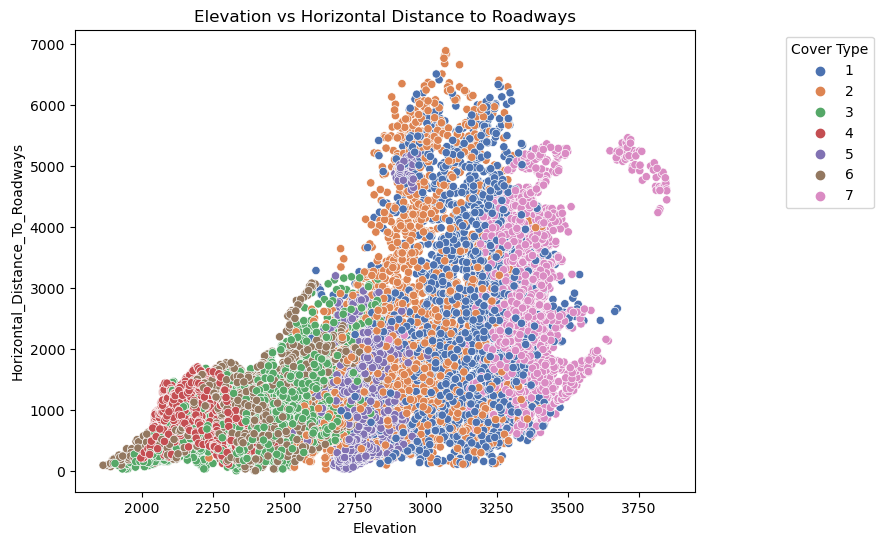

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Elevation', y='Horizontal_Distance_To_Roadways', hue='Cover_Type', data=train1, palette='deep')
plt.title('Elevation vs Horizontal Distance to Roadways')
plt.legend(title='Cover Type', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


- Cover type 4 has the lowest range of Elevation and distance to roadways compared to other forest covers.
- Cover type 6 grows on lower elevated areas but range is higher than compared to cover type 4.
- All cover type 7 trees grow on higher elevated areas but we can see a variation in their distance to roadways value.

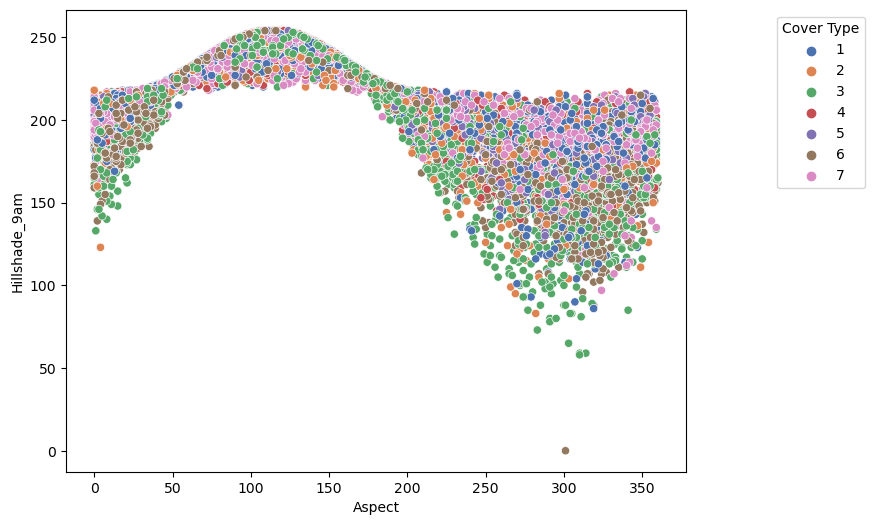

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Aspect', y='Hillshade_9am', hue='Cover_Type', data=train1, palette='deep')
plt.legend(title='Cover Type', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

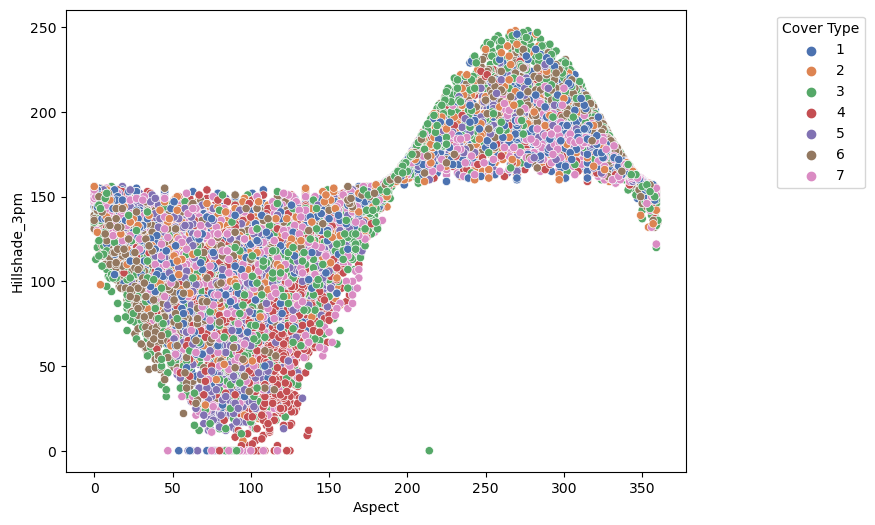

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Aspect', y='Hillshade_3pm', hue='Cover_Type', data=train1, palette='deep')
plt.legend(title='Cover Type', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

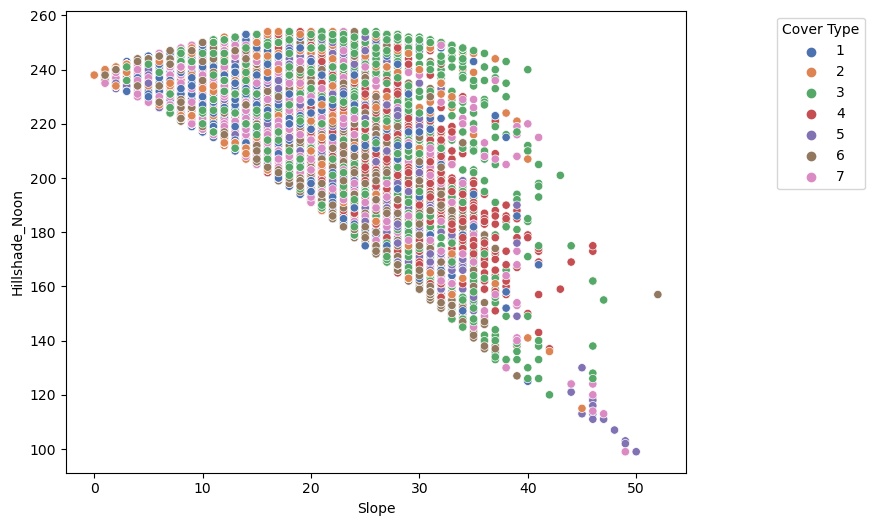

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Slope', y='Hillshade_Noon', hue='Cover_Type', data=train1, palette='deep')
plt.legend(title='Cover Type', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

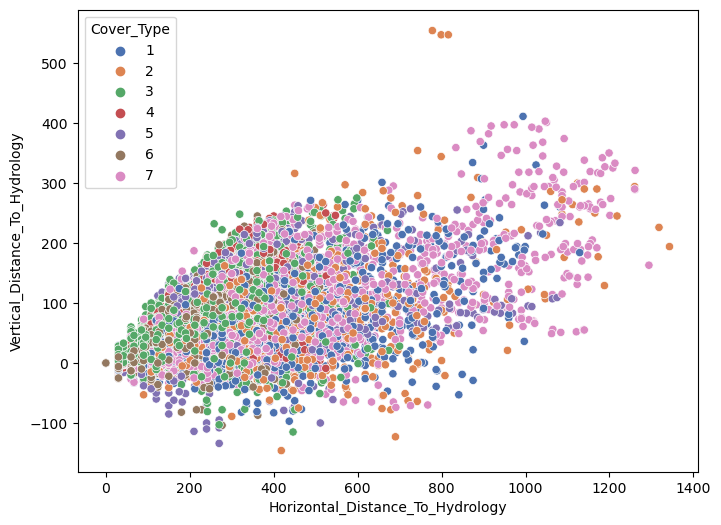

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train1, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", 
                hue="Cover_Type", palette="deep")
plt.show()

Positive correlation clearly visible

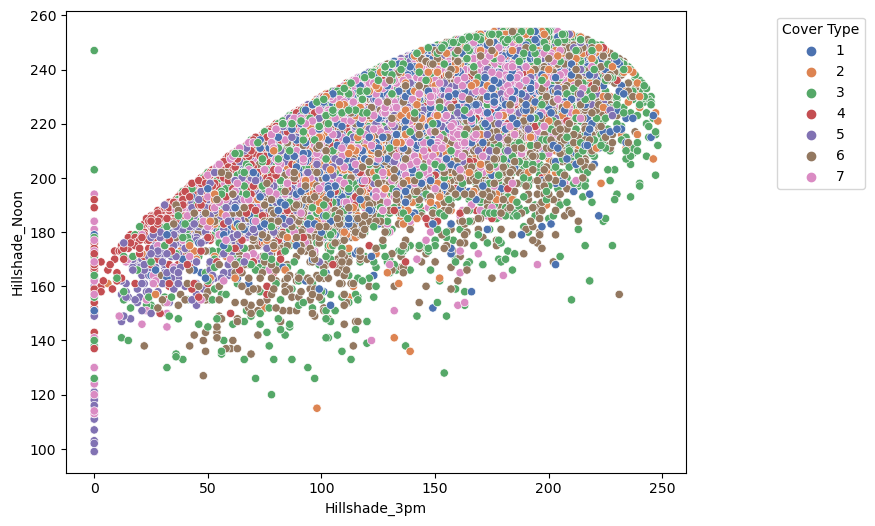

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train1, x="Hillshade_3pm", y="Hillshade_Noon", 
                hue="Cover_Type", palette="deep")
plt.legend(title='Cover Type', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

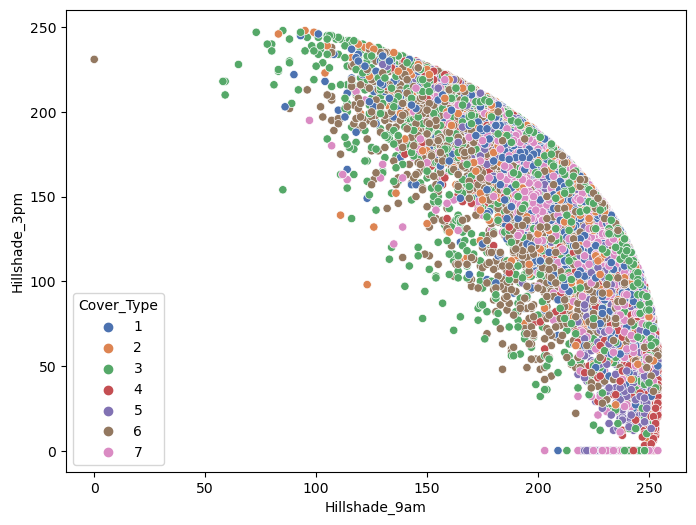

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train1, x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", palette="deep")
plt.show()

Hillshade at 9am will be opposite to the shade at 3pm on the area

### Feature Engineering

In [35]:
test1=test

In [36]:
train1["net_hyd_distance"]=np.sqrt(train1["Vertical_Distance_To_Hydrology"]**2 + train1["Horizontal_Distance_To_Hydrology"]**2)
test1["net_hyd_distance"]=np.sqrt(test1["Vertical_Distance_To_Hydrology"]**2 + test1["Horizontal_Distance_To_Hydrology"]**2)

The resulting net_hyd_distance is a measure of the total distance to hydrology, considering both the horizontal and vertical distance.

In [37]:
train1["mean_distance_horizontal"] = (train1["Horizontal_Distance_To_Hydrology"] + train1["Horizontal_Distance_To_Roadways"] + train1["Horizontal_Distance_To_Fire_Points"])/3
test1["mean_distance_horizontal"] = (test1["Horizontal_Distance_To_Hydrology"] + test1["Horizontal_Distance_To_Roadways"] + test1["Horizontal_Distance_To_Fire_Points"])/3

By calculating the mean distance to these amenities, the new feature "mean_distance_horizontal" gives an overall measure of how close each data point is, on average, to these important environmental features.

In [38]:
#Transforming the data and making it closer to a normal distribution 
train1["sqrtHorizontal_Distance_To_Hydrology"] = np.sqrt(train1["Horizontal_Distance_To_Hydrology"])
test1["sqrtHorizontal_Distance_To_Hydrology"] = np.sqrt(test1["Horizontal_Distance_To_Hydrology"])


In [39]:
# to get combined effect
train1["Elevation_m_HR"] = train1["Elevation"] * train1["Horizontal_Distance_To_Roadways"]
test1["Elevation_m_HR"] = test1["Elevation"] * test1["Horizontal_Distance_To_Roadways"]


In [40]:
train1.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,net_hyd_distance,mean_distance_horizontal,sqrtHorizontal_Distance_To_Hydrology,Elevation_m_HR
11,12,2886,151,11,371,26,5253,234,240,136,...,0,0,0,0,0,2,371.909935,3225.000000,19.261360,15160158
14,15,2503,157,4,67,4,674,224,240,151,...,0,0,0,0,0,5,67.119297,2113.666667,8.185353,1687022
15,16,2495,51,7,42,2,752,224,225,137,...,0,0,0,0,0,5,42.047592,2123.333333,6.480741,1876240
17,18,2517,72,7,85,6,595,228,227,133,...,0,0,0,0,0,5,85.211502,2095.666667,9.219544,1497615
18,19,2504,0,4,95,5,691,214,232,156,...,0,0,0,0,0,5,95.131488,2119.333333,9.746794,1730264


In [41]:
#functions for coverting one hot encoded columns to single column with num value

def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [42]:
train1.iloc[:,15:55].columns

Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [43]:
reverse_one_hot_encode(train1, 15, 55, "Soil_Type")
reverse_one_hot_encode(train1, 11, 15, "Widerness_Area_Type")

In [44]:
#doing the same for test set
reverse_one_hot_encode(test1, 15, 55, "Soil_Type")
reverse_one_hot_encode(test1, 11, 15, "Widerness_Area_Type")

In [45]:
train1

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,net_hyd_distance,mean_distance_horizontal,sqrtHorizontal_Distance_To_Hydrology,Elevation_m_HR,Soil_Type,Widerness_Area_Type
11,12,2886,151,11,371,26,5253,234,240,136,...,0,0,0,2,371.909935,3225.000000,19.261360,15160158,30,1
14,15,2503,157,4,67,4,674,224,240,151,...,0,0,0,5,67.119297,2113.666667,8.185353,1687022,18,1
15,16,2495,51,7,42,2,752,224,225,137,...,0,0,0,5,42.047592,2123.333333,6.480741,1876240,16,1
17,18,2517,72,7,85,6,595,228,227,133,...,0,0,0,5,85.211502,2095.666667,9.219544,1497615,18,1
18,19,2504,0,4,95,5,691,214,232,156,...,0,0,0,5,95.131488,2119.333333,9.746794,1730264,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,3,258.094944,733.333333,16.062378,1720620,4,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,3,662.354890,858.666667,25.159491,1608654,4,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,3,383.293621,629.000000,19.104973,834820,4,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,3,240.260276,464.000000,14.764823,601854,4,3


In [46]:
#checking function
train1.loc[15115:15119, 'Soil_Type1':'Soil_Type5']

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5
15115,0,0,0,1,0
15116,0,0,0,1,0
15117,0,0,0,1,0
15118,0,0,0,1,0
15119,0,1,0,0,0


In [47]:
#checking function
train1.loc[15115:15119, 'Wilderness_Area1':'Wilderness_Area4']

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
15115,0,0,1,0
15116,0,0,1,0
15117,0,0,1,0
15118,0,0,1,0
15119,0,0,1,0


In [48]:
train1.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [49]:
train1.columns[11:55]

Index(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [50]:
train1.drop(columns=train1.columns[11:55], inplace=True)

In [51]:
test1.drop(columns=test1.columns[11:55], inplace=True)

In [52]:
train1.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type',
       'net_hyd_distance', 'mean_distance_horizontal',
       'sqrtHorizontal_Distance_To_Hydrology', 'Elevation_m_HR', 'Soil_Type',
       'Widerness_Area_Type'],
      dtype='object')

In [53]:
test1.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'net_hyd_distance', 'mean_distance_horizontal',
       'sqrtHorizontal_Distance_To_Hydrology', 'Elevation_m_HR', 'Soil_Type',
       'Widerness_Area_Type'],
      dtype='object')

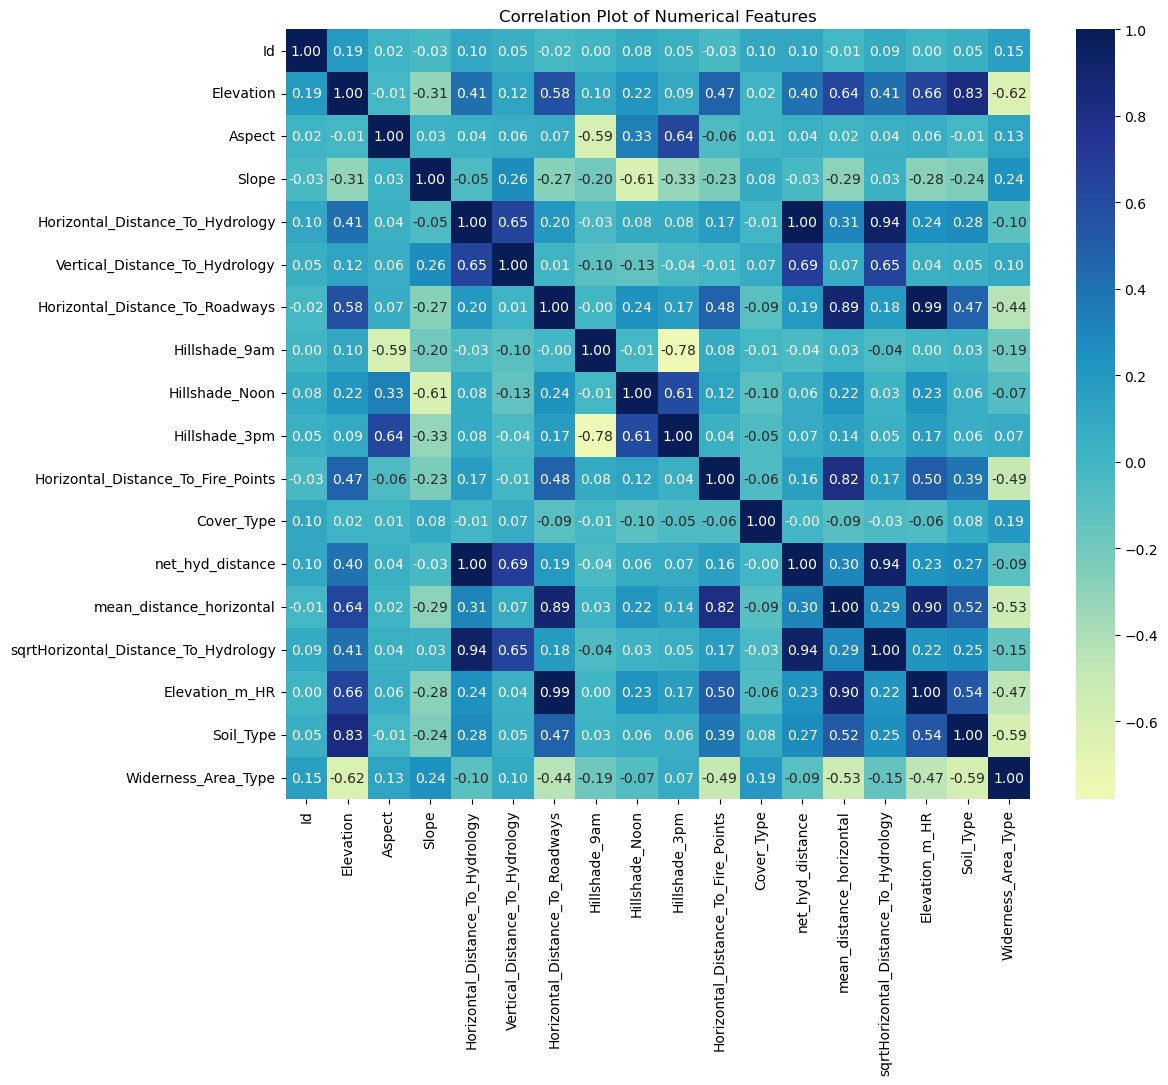

In [54]:
# Correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(train1.corr(), annot=True, cmap='YlGnBu', fmt='.2f', center=0)
plt.title('Correlation Plot of Numerical Features')
plt.show()

In [55]:
print(train1.shape)
print(test1.shape)

(14988, 18)
(565892, 17)


In [56]:
#Removing Horizontal distance to Hydrology because net hyd distance has very strong correlation with it.
#Removing Hillshade 9am because it has strong correlation with hillshade 3pm
#Removing ID, as it is not important for prediction 

train1 = train1.drop(['Horizontal_Distance_To_Hydrology', 'Hillshade_9am', 'Id'], axis=1)
test1 = test1.drop(['Horizontal_Distance_To_Hydrology', 'Hillshade_9am', 'Id'], axis=1)

print(train1.shape)
print(test1.shape)

(14988, 15)
(565892, 14)


In [57]:
train1.head()

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,net_hyd_distance,mean_distance_horizontal,sqrtHorizontal_Distance_To_Hydrology,Elevation_m_HR,Soil_Type,Widerness_Area_Type
11,2886,151,11,26,5253,240,136,4051,2,371.909935,3225.000000,19.261360,15160158,30,1
14,2503,157,4,4,674,240,151,5600,5,67.119297,2113.666667,8.185353,1687022,18,1
15,2495,51,7,2,752,225,137,5576,5,42.047592,2123.333333,6.480741,1876240,16,1
17,2517,72,7,6,595,227,133,5607,5,85.211502,2095.666667,9.219544,1497615,18,1
18,2504,0,4,5,691,232,156,5572,5,95.131488,2119.333333,9.746794,1730264,18,1


### Train-Validation split

In [58]:
X = train1.drop(["Cover_Type"],axis = 1)
y = np.array(train1.Cover_Type)
print(X.shape)
print(y.shape)

(14988, 14)
(14988,)


In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(11990, 14)
(11990,)
(2998, 14)
(2998,)


In [60]:
X_train.head()

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,net_hyd_distance,mean_distance_horizontal,sqrtHorizontal_Distance_To_Hydrology,Elevation_m_HR,Soil_Type,Widerness_Area_Type
14604,2921,41,18,69,626,197,106,1611,265.135814,831.000000,16.000000,1828546,32,3
927,2698,71,14,8,1554,211,104,564,31.048349,716.000000,5.477226,4192692,20,1
1750,3148,163,13,10,2185,243,140,2718,90.553851,1664.333333,9.486833,6878380,29,1
7637,2653,65,20,42,1866,195,84,1953,196.540072,1337.000000,13.856406,4950498,4,3
11983,3361,298,11,21,3274,236,188,1716,459.480141,1816.333333,21.424285,11003914,39,1


In [61]:
X_val.head()

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,net_hyd_distance,mean_distance_horizontal,sqrtHorizontal_Distance_To_Hydrology,Elevation_m_HR,Soil_Type,Widerness_Area_Type
6099,2298,162,19,0,1110,241,128,1055,0.000000,721.666667,0.000000,2550780,3,4
10088,3101,342,8,4,309,229,163,2100,30.265492,813.000000,5.477226,958209,22,2
12849,2329,349,8,50,443,226,160,579,188.743212,401.333333,13.490738,1031747,10,4
6625,2544,307,7,18,577,236,175,1180,242.668498,666.333333,15.556349,1467888,6,4
8990,3041,123,10,0,3376,233,126,2495,0.000000,1957.000000,0.000000,10266416,23,3


In [62]:
test1.head()

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,net_hyd_distance,mean_distance_horizontal,sqrtHorizontal_Distance_To_Hydrology,Elevation_m_HR,Soil_Type,Widerness_Area_Type
0,2680,354,14,0,2684,214,156,6645,0.0,3109.666667,0.0,7193120,29,1
1,2683,0,13,0,2654,216,152,6675,0.0,3109.666667,0.0,7120682,29,1
2,2713,16,15,0,2980,208,137,6344,0.0,3108.000000,0.0,8084740,29,1
3,2709,24,17,0,2950,201,125,6374,0.0,3108.000000,0.0,7991550,29,1
4,2706,29,19,0,2920,195,115,6404,0.0,3108.000000,0.0,7901520,29,1


In [63]:
# Selecting only the numerical columns for scaling (exclude Soil_Type and Wilderness_Area_Type)
cols_for_scaler = ['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points', 'net_hyd_distance',
                  'mean_distance_horizontal', 'sqrtHorizontal_Distance_To_Hydrology',
                  'Elevation_m_HR']

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training features
X_train[cols_for_scaler] = scaler.fit_transform(X_train[cols_for_scaler])

In [65]:
# Transforming the validation features using the scaler fitted on the training data
X_val[cols_for_scaler] = scaler.transform(X_val[cols_for_scaler])

#Transforming the test set
test1[cols_for_scaler]= scaler.transform(test1[cols_for_scaler])

In [71]:
# X_train.head()

In [72]:
# X_val.head()

In [74]:
#test1.head()

## Building Models

In [202]:
def fit_evaluate_model_validation(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    
    # Calculate accuracy on the validation set
    acc = accuracy_score(y_val, y_pred_val)

    # Perform cross-validation to get average accuracy
    kfold = model_selection.KFold(n_splits=10)
    acc_cv = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold, scoring='accuracy', n_jobs=-1).mean()

    # Calculate other evaluation metrics
    roc = roc_auc_score(y_val, model.predict_proba(X_val), multi_class='ovr')
    prec = precision_score(y_val, y_pred_val, average='macro')
    rec = recall_score(y_val, y_pred_val, average='macro')
    f1 = f1_score(y_val, y_pred_val, average='macro')

    # Create a DataFrame to store the results
    results = pd.DataFrame([[model.__class__.__name__, acc, acc_cv, prec, rec, f1, roc]],
                           columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
    return results

In [80]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=42,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPredict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [156]:
# # function to train a given model, generate predictions, and return accuracy score
# def fit_evaluate_model(model, X_train, y_train, X_val, y_val):
#     model.fit(X_train, y_train)
#     y_pred_val = model.predict(X_val)
#     return accuracy_score(y_val, y_pred_val)

### Logistic Regression

For tuning, I created regularization hyperparameter distribution using uniform distribution;
Using a uniform distribution means that all values within this range are equally likely to be sampled during parameter tuning. 
For example, the C value can be 0.5, 2.3, 3.8, or any other value between 0 and 4.
A higher 'C' value reduces the impact of regularization, while a lower 'C' value increases it.

In [169]:
#with default parameter
logi = LogisticRegression(random_state=42)
logi_results_def = fit_evaluate_model_validation(logi, X_train, y_train, X_val, y_val)
logi_results_def


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,LogisticRegression,0.640761,0.638616,0.629566,0.636984,0.630607,0.925304


In [164]:
#with tuning

In [269]:
start_time=time.time()
# Define the hyperparameter options

C = [0.01, 0.1, 1.0, 10.0]
solver = ['newton-cg','saga']




# Create hyperparameter options
hyperparameters = dict(
    C=C,solver=solver

)

# Create the Logistic Regression model
model_logi = LogisticRegression(random_state=42,max_iter=500, multi_class='multinomial', n_jobs=-1)

# Perform random search and find the best model and best hyperparameters
lr_RandSearch = RandomSearch(X_train, y_train, model_logi, hyperparameters)
best_model, best_params = lr_RandSearch.RandomSearch()

/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/xeh

Best: 0.700083 using {'solver': 'newton-cg', 'C': 10.0}


In [274]:
# Use the best hyperparameters to create the new Logistic Regression model
lr1 = LogisticRegression(solver='newton-cg',C=10,random_state=42)

# Evaluate the new Logistic Regression model on the validation set
results_lr1 = fit_evaluate_model_validation(lr1, X_train, y_train, X_val, y_val)
results_lr1

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,LogisticRegression,0.701468,0.6995,0.692065,0.699153,0.693825,0.94705


### SVM

In [255]:
#default
svm_def = SVC(random_state=42)
svm_def.fit(X_train,y_train)
y_predict_svc1 = svm_def.predict(X_val)

acc = accuracy_score(y_val, y_predict_svc1)
acc_svc = cross_val_score(estimator = svm_def, X = X_train, y = y_train, cv = kfold,scoring='accuracy')
prec = precision_score(y_val, y_predict_svc1, average='macro')
rec = recall_score(y_val, y_predict_svc1, average='macro')
f1= f1_score(y_val, y_predict_svc1, average='macro')

svm_results_def = pd.DataFrame([['SVM',acc, acc_svc.mean(), prec, rec, f1]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score'])
svm_results_def

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,SVM,0.675117,0.6603,0.672037,0.673888,0.666749


In [ ]:
#the follwoing commented cell takes too much time (5hrs+, no output.)

In [257]:
# start_time=time.time()

# model = SVC(random_state=42)

# C=[0.1,1, 10]
# gamma=[1,0.1,0.01,0.001]
# kernel=['rbf', 'poly', 'sigmoid', 'linear']

# # Create hyperparameter options
# hyperparameters = dict(C=C,gamma=gamma,kernel=kernel)

# svc_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)

# Prediction_svc = svc_RandSearch.BestModelPredict(X_val)
# print("It took %s seconds to execute" % (time.time() - start_time))

In [ ]:
svc1=SVC(C=1000, kernel= 'rbf', gamma=1,random_state=42)
svc1.fit(X_train,y_train)

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=42)

y_predict_svc1 = svc1.predict(X_val)
acc = accuracy_score(y_val, y_predict_svc1)
acc_svc = cross_val_score(estimator = svc1, X = X_train, y = y_train, cv = kfold,scoring='accuracy')
prec = precision_score(y_val, y_predict_svc1, average='macro')
rec = recall_score(y_val, y_predict_svc1, average='macro')
f1= f1_score(y_val, y_predict_svc1, average='macro')

results_svc1 = pd.DataFrame([['SVM',acc, acc_svc.mean(), prec, rec, f1]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_svc1

### KNN

In [178]:
#default
knn_def = KNeighborsClassifier()
knn_results_def = fit_evaluate_model(knn_def, X_train, y_train, X_val, y_val)
knn_results_def

0.8032021347565044

In [179]:
#with tuning

# Define the hyperparameter options
n_neighbors = [3, 5, 7, 10, 15]
weights = ['uniform', 'distance']
metric=['minkowski', 'chebyshev','euclidean','manhattan']
p = [1, 2]

# Create hyperparameter options
hyperparameters = dict(
    n_neighbors=n_neighbors, weights=weights,
    p=p, metric=metric
)

model = KNeighborsClassifier()

# Perform random search and find the best model and best hyperparameters
knn_RandSearch = RandomSearch(X_train, y_train, model, hyperparameters)
best_model, best_params = knn_RandSearch.RandomSearch()

# Use the best hyperparameters to create the new KNN model
knn1 = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    p=best_params['p']
)

# Evaluate the new KNN model on the validation set
results_knn1 = fit_evaluate_model_validation(knn1, X_train, y_train, X_val, y_val)

results_knn1


Best: 0.824354 using {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'metric': 'minkowski'}


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,KNeighborsClassifier,0.835223,0.82452,0.830692,0.834103,0.829067,0.953461


### Decision Trees

In [180]:
dt_def = DecisionTreeClassifier(random_state=42)
dt_results_def = fit_evaluate_model_validation(dt_def, X_train, y_train, X_val, y_val)

dt_results_def

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,DecisionTreeClassifier,0.795197,0.784404,0.791819,0.793863,0.792554,0.879885


In [ ]:
#with tuning

In [143]:
model = DecisionTreeClassifier(random_state=42)

max_depth= [2,3, 4,5, 6, 8, 10, 20]
min_samples_leaf=[2,5,8, 10, 15, 20, 30]
criterion= ["gini", "entropy"]
splitter=["best", "random"]
min_samples_split=[2,3,4,5,6,7,10,15,20]

# Create hyperparameter options
hyperparameters = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,criterion=criterion,splitter=splitter, min_samples_split=min_samples_split)

dt_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)

Prediction_dt = dt_RandSearch.BestModelPredict(X_val)

Best: 0.780651 using {'splitter': 'best', 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'entropy'}


In [155]:
dt1 = DecisionTreeClassifier(max_depth= 20, min_samples_leaf = 2, criterion='entropy',splitter='best',min_samples_split=7, random_state=42)
results_dt1 = fit_evaluate_model_validation(dt1, X_train, y_train, X_val, y_val)

results_dt1


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,DecisionTreeClassifier,0.787859,0.779566,0.788143,0.786681,0.786783,0.907301


## LightGBM

In [181]:
#with default parameter
lgbm_def=LGBMClassifier(random_state=42)
lgbm_results_def = fit_evaluate_model_validation(lgbm_def, X_train, y_train, X_val, y_val)
lgbm_results_def


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,LGBMClassifier,0.865243,0.856881,0.861836,0.86466,0.861981,0.985539


In [203]:
#tuning
model = LGBMClassifier(random_state=42)

reg_lambda= [0, 1e-1, 1, 5, 10, 20, 50, 100]
reg_alpha=[0,0.01,0.03]
learning_rate=[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.3]
subsample=[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
n_estimators=[10,100,500]
min_child_samples=[5,10,15]
random_state=[42]
max_depth=[-1,3,5,10,20]
num_leaves=[20,40,60,80,100]

# Create hyperparameter options
hyperparameters = dict(reg_lambda=reg_lambda,reg_alpha=reg_alpha,learning_rate=learning_rate,
                       n_estimators=n_estimators,subsample=subsample,max_depth=max_depth,
                       random_state=random_state,num_leaves=num_leaves,min_child_samples=min_child_samples)

lgbm_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)

Prediction_lgbm = lgbm_RandSearch.BestModelPredict(X_val)

Best: 0.873061 using {'subsample': 0.95, 'reg_lambda': 0, 'reg_alpha': 0.01, 'random_state': 42, 'num_leaves': 80, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 20, 'learning_rate': 0.15}


In [205]:
lgbm1 = LGBMClassifier(subsample= 0.95, reg_lambda= 0, reg_alpha= 0.01, random_state= 42, 
                       num_leaves= 80, n_estimators= 100, min_child_samples= 10, max_depth= 20, 
                       learning_rate= 0.15 )
results_lgbm1 = fit_evaluate_model_validation(lgbm1, X_train, y_train, X_val, y_val)

results_lgbm1

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,LGBMClassifier,0.883256,0.868557,0.880729,0.882708,0.881134,0.98736


## AdaBoost

In [182]:
#with default parameter
ada_def=AdaBoostClassifier(random_state=42)
ada_results_def = fit_evaluate_model_validation(ada_def, X_train, y_train, X_val, y_val)
ada_results_def

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,AdaBoostClassifier,0.347565,0.364554,0.384461,0.354973,0.258503,0.796096


In [209]:
#with tuning

In [207]:
start_time=time.time()
model = AdaBoostClassifier()


learning_rate=[ 0.05, 0.1, 0.15, 0.5, 1]
n_estimators = [50, 100, 1000, 2000]

random_state=[42]

# Create hyperparameter options
hyperparameters = dict(learning_rate=learning_rate,n_estimators=n_estimators,random_state=random_state)

ada_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)

Prediction_ada = ada_RandSearch.BestModelPredict(X_val)
print("It took %s seconds to execute" % (time.time() - start_time))

Best: 0.426105 using {'random_state': 42, 'n_estimators': 50, 'learning_rate': 0.5}
It took 524.296731710434 seconds to execute


In [208]:
ada1 = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=0.5)
results_ada1 = fit_evaluate_model_validation(ada1, X_train, y_train, X_val, y_val)

results_ada1

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,AdaBoostClassifier,0.41928,0.424354,0.435148,0.428334,0.364625,0.830086


## MLP

In [214]:
#with default parameter
mlp_def=MLPClassifier(random_state=42, max_iter=500)
mlp_results_def = fit_evaluate_model_validation(mlp_def, X_train, y_train, X_val, y_val)
mlp_results_def

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,MLPClassifier,0.795197,0.787823,0.790617,0.793271,0.79073,0.970746


In [ ]:
#with default parameter
mlp_def=MLPClassifier(random_state=42, max_iter=500)
mlp_results_def = fit_evaluate_model_validation(mlp_def, X_train, y_train, X_val, y_val)
mlp_results_def

In [237]:
#with tuning
start_time=time.time()

#hidden_layer_sizes = [(50,), (100,100), (50, 50), (100, 50)]
activation = ['relu', 'tanh']
solver = ['sgd', 'adam']
learning_rate = ['invscaling', 'adaptive']
alpha = [0.0001, 0.01, 0.1]

mlp_model = MLPClassifier(random_state=42, max_iter=500, learning_rate_init=1, early_stopping=True )

hyperparameters = {
    #'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'solver': solver,
    'learning_rate': learning_rate,
    'alpha': alpha
}

mlp_RandSearch = RandomSearch(X_train,y_train, mlp_model, hyperparameters)
Prediction_mlp = mlp_RandSearch.BestModelPredict(X_val)
print("It took %s seconds to execute" % (time.time() - start_time))

Best: 0.543453 using {'solver': 'sgd', 'learning_rate': 'adaptive', 'alpha': 0.1, 'activation': 'tanh'}
It took 112.4862220287323 seconds to execute


In [238]:
mlp1=MLPClassifier(random_state=42, max_iter=500, learning_rate_init=1,
                     solver='sgd',learning_rate='adaptive',
                    alpha=0.1, activation='tanh')
results_mlp1 = fit_evaluate_model_validation(mlp1, X_train, y_train, X_val, y_val)
results_mlp1

/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warning

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,MLPClassifier,0.707472,0.695496,0.696967,0.705347,0.698577,0.949964


In [ ]:
#tuning hidden layer size

In [235]:
mlp1=MLPClassifier(random_state=42, max_iter=1000, learning_rate_init=0.5,
                     solver='sgd',learning_rate='adaptive',hidden_layer_sizes=(100,50),
                    alpha=0.1, activation='tanh')
results_mlp1 = fit_evaluate_model_validation(mlp1, X_train, y_train, X_val, y_val)
results_mlp1

/Users/xehad/anaconda3/envs/pfenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,MLPClassifier,0.773849,0.748874,0.767517,0.772606,0.766136,0.964124


### Extra Trees Classifier

In [107]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [109]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [110]:
random_cv.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=2, min_samples_split=5,
                     n_estimators=1000, random_state=42)

In [236]:
xtree = ExtraTreesClassifier(n_estimators=1000, max_features=None, min_samples_leaf=2, min_samples_split=5,
                                                     random_state=42)

xtree_acc = fit_evaluate_model_validation(xtree, X_train, y_train, X_val, y_val)
xtree_acc

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,ExtraTreesClassifier,0.888926,0.873978,0.886655,0.888603,0.886612,0.989111


### Comparison of Models based on Accuracy and F1 Score

In [278]:
all_dfs = [results_lr1, svm_results_def, results_knn1, dt_results_def, results_lgbm1, results_ada1, mlp_results_def, xtree_acc]
merged_df = pd.concat(all_dfs)

# Extracting the relevant columns from the merged dataframe
result_df = merged_df[['Model', 'Accuracy', 'F1 Score']]

# separate dataframes for accuracy and F1 score
accuracy_df = result_df[['Model', 'Accuracy']].sort_values(by='Accuracy', ascending=False)
f1_score_df = result_df[['Model', 'F1 Score']].sort_values(by='F1 Score', ascending=False)

# Reset the index for the dataframes
accuracy_df.reset_index(drop=True, inplace=True)
f1_score_df.reset_index(drop=True, inplace=True)


print("Comparison based on Accuracy:")
print(accuracy_df)

print("\nComparison based on F1 Score:")
print(f1_score_df)


Comparison based on Accuracy:
                    Model  Accuracy
0    ExtraTreesClassifier  0.888926
1          LGBMClassifier  0.883256
2    KNeighborsClassifier  0.835223
3  DecisionTreeClassifier  0.795197
4           MLPClassifier  0.795197
5      LogisticRegression  0.701468
6                     SVM  0.675117
7      AdaBoostClassifier  0.419280

Comparison based on F1 Score:
                    Model  F1 Score
0    ExtraTreesClassifier  0.886612
1          LGBMClassifier  0.881134
2    KNeighborsClassifier  0.829067
3  DecisionTreeClassifier  0.792554
4           MLPClassifier  0.790730
5      LogisticRegression  0.693825
6                     SVM  0.666749
7      AdaBoostClassifier  0.364625


In [ ]:
accuracy_df['Accuracy']

## Ensemble-Top3

In [280]:
# Create a list of top 3 models
top3_models = [('Extra Trees Classifier', xtree), ('LGBM', lgbm1), ('KNN', knn1)]

ensemble_top3 = VotingClassifier(estimators=top3_models)

# Fit the ensemble model on the training data
ensemble_top3.fit(X_train, y_train)

# Make predictions on the validation set
ensemble_top3_preds = ensemble_top3.predict(X_val)

# Calculate accuracy of the ensemble model
ensemble_top3_accuracy = accuracy_score(y_val, ensemble_top3_preds)

print("Ensemble Top 3 Accuracy:", ensemble_top3_accuracy)


Ensemble Top 3 Accuracy: 0.8872581721147431


In [285]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('Extra Trees Classifier', xtree), ('LGBM', lgbm1), ('KNN', knn1)]

stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

stacking_classifier.fit(X_train, y_train)


stacking_preds = stacking_classifier.predict(X_val)

# Calculate accuracy of the stacking classifier
stacking_accuracy = accuracy_score(y_val, stacking_preds)

print("Stacking Classifier_Top3:", stacking_accuracy)


Stacking Classifier_Top3: 0.8932621747831888


## Ensemble-Top5

In [321]:
top5_models = [('Extra Trees Classifier', xtree), ('LGBM', lgbm1), ('KNN', knn1), ('DT', dt_def), ('MLP', mlp_def)]

ensemble_top5 = VotingClassifier(estimators=top5_models)

# Fit the ensemble model on the training data
ensemble_top5.fit(X_train, y_train)

# Make predictions on the validation set
ensemble_top5_preds = ensemble_top5.predict(X_val)

# Calculate accuracy of the ensemble model
ensemble_top5_accuracy = accuracy_score(y_val, ensemble_top5_preds)

print("Ensemble Top 5 Accuracy:", ensemble_top5_accuracy)

Ensemble Top 5 Accuracy: 0.8845897264843229


In [288]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('Extra Trees Classifier', xtree), ('LGBM', lgbm1), ('KNN', knn1), ('DT', dt_def), ('MLP', mlp_def)]


stacking_top5 = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

stacking_top5.fit(X_train, y_train)


stacking_preds = stacking_top5.predict(X_val)

# Calculate accuracy of the stacking classifier
stacking_accuracy = accuracy_score(y_val, stacking_preds)

print("Stacking Classifier_Top5:", stacking_accuracy)

Stacking Classifier_Top5: 0.8942628418945964


In [ ]:
#best model on test set

In [289]:
final_pred_test=stacking_top5.predict(test1)

In [310]:
final_pred_test.shape

(565892,)

In [294]:
test1.shape

(565892, 14)

#### Making ready for test result submission

In [308]:
id_values = range(15121, 581013)

# Create a DataFrame with 'Id' and 'Cover_Type' columns
df_result = pd.DataFrame({'Id': id_values, 'Cover_Type': final_pred_test})

# Display the DataFrame
print(df_result)

            Id  Cover_Type
0        15121           2
1        15122           2
2        15123           2
3        15124           2
4        15125           2
...        ...         ...
565887  581008           3
565888  581009           3
565889  581010           3
565890  581011           3
565891  581012           3

[565892 rows x 2 columns]


In [309]:
# Save the DataFrame to a CSV file
df_result.to_csv('predicted_cover_type.csv', index=False)

Using the ensemble model of top5 models, the test accuracy is: 0.78663


## Saving the trained model

In [313]:
import joblib

In [314]:
# Save the Extra Trees (top classifier) model
joblib.dump(xtree, "top_classifier_model_xtree.pkl")

# Save the LGBM (2nd best classifier) model
joblib.dump(lgbm1, "second_best_classifier_model_lgbm.pkl")

# Save the StackingClassifier (ensemble classifier) model
joblib.dump(stacking_top5, "ensemble_classifier_model_5.pkl")

['ensemble_classifier_model_5.pkl']

## Load the model

In [320]:
top_classifier = joblib.load("top_classifier_model_xtree.pkl")
second_best_classifier = joblib.load("second_best_classifier_model_lgbm.pkl")
ensemble_classifier = joblib.load("ensemble_classifier_model_5.pkl")

In [322]:
ensemble_pred = ensemble_classifier.predict(X_val)

# Calculate accuracy of the stacking classifier(top5)
ensemble_accuracy = accuracy_score(y_val, ensemble_pred)

print("Ensemble Classifier_Top5:", ensemble_accuracy)

Ensemble Classifier_Top5: 0.8942628418945964


In [323]:
#model checked

# Classification Task on 'Forest Cover Type Prediction' -Summary

This repository contains code for applying classification techniques on the 'Forest Cover Type Prediction' dataset. After performing EDA, data preprocessing, and feature engineering, I have built various classification models to predict forest cover type.

## Dataset

The data includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. I have listed below the name of all the features:

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
The wilderness areas are:

         1 - Rawah Wilderness Area
         2 - Neota Wilderness Area
         3 - Comanche Peak Wilderness Area
         4 - Cache la Poudre Wilderness Area
         
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation:
The seven cover types are:

         1 - Spruce/Fir
         2 - Lodgepole Pine
         3 - Ponderosa Pine
         4 - Cottonwood/Willow
         5 - Aspen
         6 - Douglas-fir
         7 - Krummholz


## Workflow

1. **Data Preprocessing and EDA**: 

Both train and test dataset are loaded and being analyzed. There are 15120 data with 56 columns in the train set and 565892 data with 55 features in the test set. I have checked for missing values (no missing values are present), measured skewness (most of the features are positively skewed), presented distribution of the data, and other significant statistics. There are also some outliers on the training dataset. I used the logic of extreme outliers as this is a standard and widely used technique for outlier detection to keep as much rows as possible. I dropped data points if they satisfy the following conditions:

- x < Q1 - 3 * IQR
- x > Q3 + 3 * IQR

In EDA, I have illustrated percentage of wilderness area type and the amount of each forest cover type present in each wilderness area. Among the soil types, Soil type 10 and 29 are mostly present in the training data. I have plotted distribution of various features. I calculated and demonstrated the correlation among features. After performing thorough analysis of various plots and characteristics of data, I have done some feature engineering. I have also converted 40 soil types and 4 wilderness area into separate single column and removed the previous columns. By observing correaltion and other information, I have transformed the training data into 14988 rows and 15 columns including the target column.

2. **Splitting the dataset**:

The training dataset is split in a 80-20 ratio for training and validation. I have performed Standard Scaler operation on the data before starting to build the model.

3. **Classification Models**: 

I have used the following algorithms. I have provided brief background details of each technique I used :

* **Logistic Regression**:
Logistic Regression is a linear classification algorithm used for binary and multiclass classification tasks. It models the relationship between the input features and the probability of belonging to a particular class using the logistic function, also known as the sigmoid function. It predicts the probability of an instance belonging to each class and then assigns the instance to the class with the highest probability. In the case of multiclass problems, it uses the one-vs-rest (OvR) strategy to transform the multiclass problem into multiple binary classification tasks, where each class is treated as a separate binary classification problem.

* **Support Vector Machine (SVM)**:
SVM is a powerful algorithm for multiclass classification. It finds the optimal hyperplane that maximizes the margin between classes. SVM is effective in high-dimensional spaces and can handle complex data distributions. It also allows the use of different kernels for nonlinear classification.

* **K-Nearest Neighbors (KNN)**:
KNN is a non-parametric algorithm that classifies data points based on the majority class of their k-nearest neighbors. It's simple to understand and implement. KNN can be sensitive to noisy data and requires careful selection of the appropriate value of k. However, it can be computationally expensive for large datasets and sensitive to the choice of K.

* **Decision Tree**:
Decision Trees are non-linear classification algorithms that recursively split the data into subsets based on the feature that provides the best separation at each node. For multiclass problems, decision trees can handle multiple classes directly without the need for transformation. The class with the highest number of instances in a leaf node is assigned as the prediction for that leaf.

* **AdaBoost (Adaptive Boosting)**:
AdaBoost is an ensemble learning technique that combines weak learners to create a strong learner. It sequentially trains the weak learners, giving higher weights to misclassified samples in each iteration. AdaBoost focuses on difficult-to-classify samples and adapts to complex decision boundaries. It can be used for multiclass problems through the SAMME, SAMME.R algorithm.

* **Light Gradient Boosting Machine (LightGBM)**:
LightGBM is a gradient boosting framework that uses a tree-based learning algorithm. It is designed for efficiency and can handle large-scale datasets efficiently. LightGBM uses a leaf-wise tree growth strategy, leading to faster training times and lower memory usage. It supports multiclass classification through one-vs-rest and one-vs-one strategies.

* **Multi-Layer Perceptron (MLP)**:
MLP is a type of artificial neural network used for multiclass classification. It consists of multiple layers of interconnected neurons and uses backpropagation to learn from the data. MLP can handle multiclass problems by using a softmax activation function in the output layer, which produces a probability distribution over the classes, and the class with the highest probability is chosen as the prediction.

* **Extra Trees Classifier**:
Extra Trees is an extension of the Random Forest algorithm. It builds multiple decision trees and further randomizes the feature selection and node splitting, making it even less prone to overfitting. Extra Trees can handle multiclass problems and can be an effective choice when dealing with high-dimensional data.

* **Ensemble Classifier**:
Ensemble classifiers combine multiple individual classifiers to improve overall performance. Voting and stacking are two popular ensemble techniques used in machine learning.

Voting Ensemble: In a voting ensemble, multiple base classifiers are trained independently on the same training data. During prediction, each base classifier makes its own prediction, and the final prediction is determined by majority voting (classification).
Voting can be done using either hard voting (simple majority) or soft voting (weighted average of probabilities).
Voting ensembles work well when the base classifiers have diverse strengths and weaknesses.

Stacking Ensemble:Stacking, also known as stacked generalization, involves training multiple base classifiers and a meta-classifier (also called the blender or meta-learner). The base classifiers are trained on the same training data, and their predictions are combined to create a new feature set. The meta-classifier is then trained on the new feature set to make the final predictions. Stacking allows the meta-classifier to learn how to best combine the predictions of the base classifiers, potentially improving overall performance. Stacking is more complex than voting but can be more powerful if implemented properly.

4. **Evaluation Metrics**:

For evaluation, I have used Accuracy, Precision, Recall, F1 Score, Cross validation Accuracy, and ROC Score. I want to add about the following parameters while using those metrics.

Macro Average: The macro average calculates the metric independently for each class and then takes the unweighted mean (average) of those class-wise metrics. It treats all classes equally and does not consider class imbalances. Use the "macro" average when you want to give equal importance to each class and you have a balanced dataset.

ROC score: For multiclass classification problems (i.e., more than two classes), the interpretation of ROC-AUC is not as straightforward as in binary classification. ROC-AUC can be computed using the one-vs-rest (OvR) approach, but it may not fully capture the model's performance for all classes simultaneously. In multiclass problems, other metrics like accuracy, precision, recall, and F1-score are more commonly used. In some specific scenarios, ROC-AUC might be relevant even for multiclass problems. For example, if one is interested in evaluating the performance of a multiclass classifier in distinguishing a particular class from all other classes combined, one can use ROC-AUC with the OvR approach. In ROC, a separate binary classifier is trained for each class in One-vs-Rest (OvR) strategy. Each classifier is responsible for distinguishing one class from the rest of the classes. During prediction, the class with the highest confidence (probability) from all binary classifiers is selected as the final predicted class. OvR is computationally efficient and often works well for most multiclass problems.


5. **Result**

The following scores are based on validation set. Best model is applied to the test set later on.

| Model                 | Accuracy   | F1 Score   |
| --------------------- | ---------- | ---------- |
| ExtraTreesClassifier  | 0.888926   | 0.886612   |
| LGBMClassifier        | 0.883256   | 0.881134   |
| KNeighborsClassifier  | 0.835223   | 0.829067   |
| DecisionTreeClassifier| 0.795197   | 0.792554   |
| MLPClassifier         | 0.795197   | 0.790730   |
| LogisticRegression    | 0.701468   | 0.693825   |
| SVM                   | 0.675117   | 0.666749   |
| AdaBoostClassifier    | 0.419280   | 0.364625   |

Accuracy of ensemble model using the top3 models: 0.8932621747831888

Accuracy of ensemble model using the top5 models: 0.8942628418945964

Using the ensemble model of top5 models, the test accuracy is: 0.78663 (after submitting in kaggle competition)


## Conclusion

In conclusion, in this task, ExtraTreesClassifier demonstrated the best performance in predicting forest cover type. The results highlight the effectiveness of Extra Trees Classifier and ensemble of classifiers as a powerful classification techniques for this particular dataset. Further improvement of the performance achieved using ensemble of top 5 models. Generally, the best technique to use for a specific classification problem will depend on the following factors:

- The complexity of the relationship between the features and the target variable
- The amount of data available
- The desired accuracy of the predictions

Sometimes in industry, combination of algorithms are used for better performance.
